**DSCI 100 Project**

Date: October 2022

Dataset: winequality-white.csv


1. Importing relevant libraries

In [1]:
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

2. Importing the data

In [2]:
data <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine <- read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delim = ";")

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


3. Tidying the data

In [3]:
wine <- mutate(wine, quality = as_factor(quality))
colnames(wine) <- make.names(colnames(wine))
wine

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,6
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,6
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,6


4. Splitting the data

In [4]:
wine_split <- initial_split(wine, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

5. Summarizing the data in tables

In [33]:
#best_wine <- filter(wine_testing, quality == 9)

#averages1 <- group_by(wine, quality) |> summarize(avg_alcohol = mean(alcohol))
#averages1

#averages2 <- group_by(wine, quality) |> summarize(avg_chlorides = mean(chlorides))
#averages2

quality_averages <- data.frame(quality = 3, 4, 5, 6, 7, 8, 9)

columns <- list(colnames(wine))
#columns <- columns[1:11]
columns

for (c in columns) {
    new_column <- group_by(wine_training, quality) |> summarize(avg = mean(c))
    #bind_cols(quality_averages, new_column)
    #quality_averages
    }

new_column

as.logical(columns[1])

#number_of_samples <- group_by(wine, quality) |> summarize(n = n())
#number_of_samples

[[1]]
 [1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "free.sulfur.dioxide" 
 [7] "total.sulfur.dioxide" "density"              "pH"                  
[10] "sulphates"            "alcohol"              "quality"

Warning message in mean.default(c):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(c):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(c):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(c):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(c):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(c):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(c):
“argument is not numeric or logical: returning NA”


quality,avg
<fct>,<dbl>
3,NA
4,NA
5,NA
6,NA
7,NA
8,NA
9,NA


ERROR: Error in eval(expr, envir, enclos): 'list' object cannot be coerced to type 'logical'


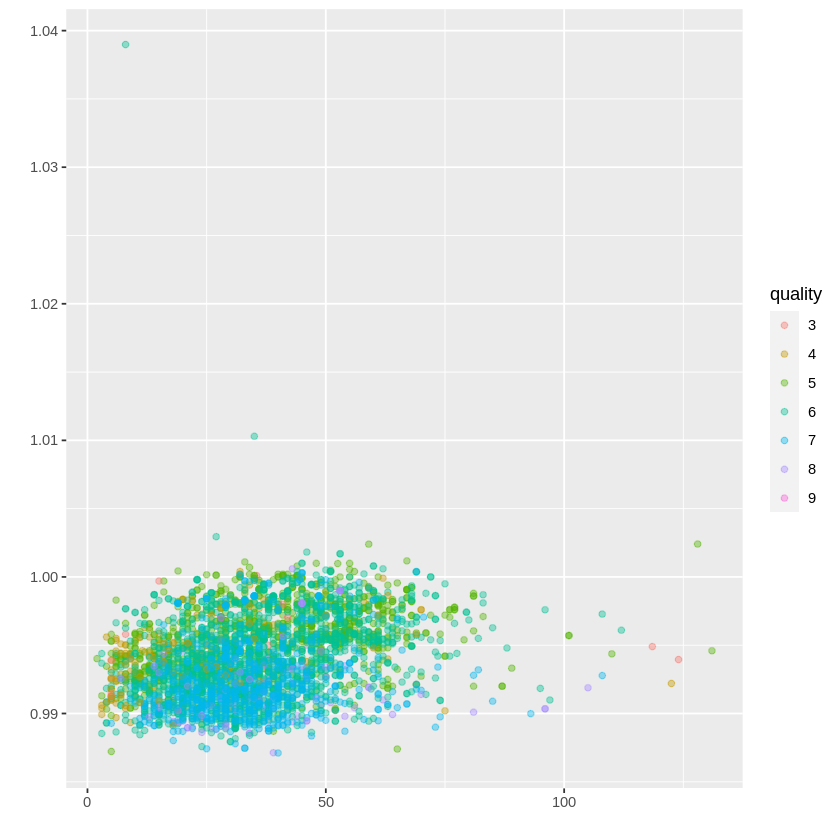

In [53]:
tester_plot <- ggplot(wine_training, aes(x = free.sulfur.dioxide, y = density, colour = quality)) +
    geom_point(alpha = 0.4) +
    labs(x = "", y = "")

tester_plot